In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [52]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 50

In [53]:
df = pd.read_csv('ses_trans.csv')
df.head()

,machine_id,site_session_id,domain_id.x,ref_domain_name,pages_viewed,duration,event_date.x,event_time.x,tran_flg,domain_name.x,prod_category_id,prod_name,domain_id.y,prod_qty,prod_totprice,basket_tot,event_date.y,event_time.y,domain_name.y
0,100278414,6.994723e+10,2.437190e+18,NaN,7,8,20140717,15:45:37,1,groupon.com,59,Five 60-minute dance lessons - Casa Salsa,2.440000e+18,1.0,25.00,25.00,20140717.0,15:50:45,groupon.com
1,100284095,4.859986e+10,4.046670e+18,NaN,23,18,20141116,0:02:58,1,amazon.com,17,Alexander Taron Rocking Horse Brown and White ...,4.050000e+18,1.0,64.05,78.14,20141116.0,0:10:28,amazon.com
2,100288922,3.900480e+10,4.046670e+18,NaN,13,10,20141221,18:20:33,1,amazon.com,16,Pearl Drops Smokers Stain Removing Whitening G...,4.050000e+18,1.0,1.99,1.43,20141221.0,18:28:01,amazon.com
3,100288922,4.280799e+10,7.579990e+18,google.com,35,35,20141204,0:36:48,1,fingerhut.com,99,WEED EATER 2-CYCLE GAS LEAF BLOWER Item No. NF309,7.580000e+18,1.0,154.99,174.98,20141204.0,1:06:42,fingerhut.com
4,100288922,5.496387e+10,4.046670e+18,NaN,44,43,20141120,3:48:14,1,amazon.com,16,Lexmark 15M0120 #20 Color Ink Cartridge Valer...,4.050000e+18,1.0,1.49,0.00,20141120.0,4:23:41,amazon.com


In [54]:
df = df[['machine_id', 'prod_category_id','duration']]
df = df.rename(columns={'machine_id': 'user','prod_category_id':'product'})
df.head()

,user,product,duration
0,100278414,59,8
1,100284095,17,18
2,100288922,16,10
3,100288922,99,35
4,100288922,16,43


In [55]:
category = pd.read_csv("product name.csv")
category.head()

,product,category name
0,1,Apparel
1,2,Shoes
2,3,Accessories
3,4,Jewelry & Watches
4,5,Other Apparel Items


In [56]:
df = pd.merge(df,category,on='product')
#df.to_csv ('rating.csv', index = False, header=True)
df

,user,product,duration,category name
0,100278414,59,8,Gift Certificates & Coupons
1,105583702,59,6,Gift Certificates & Coupons
2,105583702,59,10,Gift Certificates & Coupons
3,105583702,59,35,Gift Certificates & Coupons
4,105583702,59,15,Gift Certificates & Coupons
...,...,...,...,...
3786,110959523,60,49,Other Flower & Gift Items
3787,110959523,60,49,Other Flower & Gift Items
3788,79902327,50,27,Personals & Dating
3789,86068782,25,16,Desktop Computers


In [57]:
df.groupby('category name')['duration'].mean().sort_values(ascending=False).head()

category name
Audio & Video Equipment      52.857143
Home Furniture               52.000000
Cameras & Equipment          51.750000
Other Flower & Gift Items    49.000000
Office Furniture             47.000000
Name: duration, dtype: float64

In [58]:
df.groupby('category name')['duration'].count().sort_values(ascending=False).head()

category name
Food & Beverage      916
Health & Beauty      630
Apparel              525
Books & Magazines    149
Office Supplies      147
Name: duration, dtype: int64

In [59]:
ratings = pd.DataFrame(df.groupby('category name')['duration'].mean())
ratings.head(10)

,duration
category name,
Accessories,39.673913
Air Travel,41.460000
Apparel,36.051429
Art & Collectibles,41.107143
"Arts, Crafts & Party Supplies",44.775000
Audio & Video Equipment,52.857143
Automotive Accessories,18.466667
Baby Supplies,28.000000
Bed & Bath,44.375000


In [60]:
ratings['count'] = pd.DataFrame(df.groupby('category name')['duration'].count())
ratings.head(10)

,duration,count
category name,,
Accessories,39.673913,92
Air Travel,41.460000,50
Apparel,36.051429,525
Art & Collectibles,41.107143,56
"Arts, Crafts & Party Supplies",44.775000,40
Audio & Video Equipment,52.857143,7
Automotive Accessories,18.466667,15
Baby Supplies,28.000000,16
Bed & Bath,44.375000,32


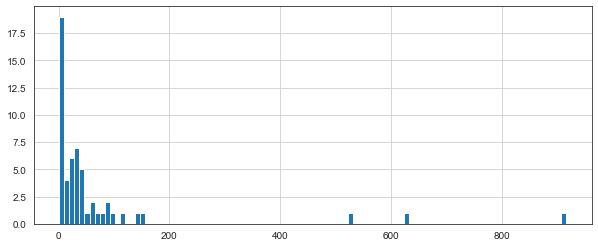

In [61]:
plt.figure(figsize=(10,4))
ratings['count'].hist(bins=100)

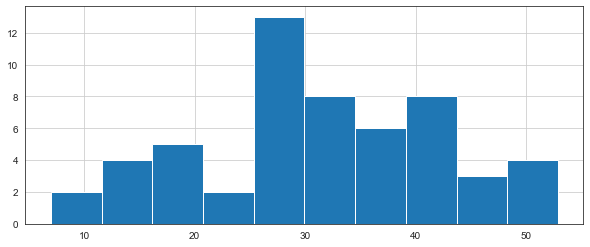

In [62]:
plt.figure(figsize=(10,4))
ratings['duration'].hist()

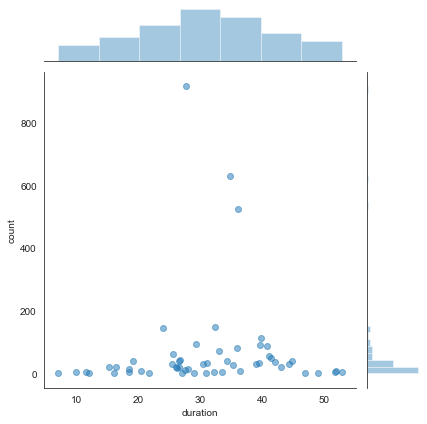

In [63]:
sns.jointplot(x='duration',y='count',data=ratings,alpha=0.5)

## Recommending Similar Movies

In [64]:
df

,user,product,duration,category name
0,100278414,59,8,Gift Certificates & Coupons
1,105583702,59,6,Gift Certificates & Coupons
2,105583702,59,10,Gift Certificates & Coupons
3,105583702,59,35,Gift Certificates & Coupons
4,105583702,59,15,Gift Certificates & Coupons
...,...,...,...,...
3786,110959523,60,49,Other Flower & Gift Items
3787,110959523,60,49,Other Flower & Gift Items
3788,79902327,50,27,Personals & Dating
3789,86068782,25,16,Desktop Computers


In [65]:
itemmat = df.pivot_table(index='user',columns='category name',values='duration')
itemmat.head()

category name,Accessories,Air Travel,Apparel,Art & Collectibles,"Arts, Crafts & Party Supplies",Audio & Video Equipment,Automotive Accessories,Baby Supplies,Bed & Bath,Books & Magazines,Business Machines,Cameras & Equipment,Car Rental,Computer Software (X Pc Games),Console Video Games,Desktop Computers,Event Tickets,Flowers,Food & Beverage,Garden & Patio,Gift Certificates & Coupons,"Handhelds, Pdas & Portable Devices",Health & Beauty,Home Appliances,Home Furniture,...,Movies & Videos,Music,Office Furniture,Office Supplies,Online Content Sales,Online Service Subscriptions,Other Apparel Items,Other Computer Supplies,Other Electronics & Supplies,Other Flower & Gift Items,Other Home & Living Items,Other Services,Other Travel,Personals & Dating,Pet Supplies,Photo Printing Services,"Printers, Monitors & Peripherals",Shipping Services,Shoes,Sport & Fitness,Tools & Equipment,Toys & Games (X Video Games),Travel Packages,Unclassified,Video Game Consoles & Accessories
user,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15847884,49.0,NaN,41.25,26.0,40.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,33.0,NaN,NaN,3.0,...,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,98.0,NaN,NaN,NaN,NaN,13.5
17171406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48841364,NaN,15.0,15.00,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.315789,NaN,8.0,NaN,20.571429,NaN,NaN,...,57.0,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,19.333333,NaN,22.166667,NaN
59981084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.100000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62191402,NaN,NaN,NaN,83.0,NaN,NaN,NaN,NaN,NaN,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,NaN,NaN,NaN,83.000000,NaN


In [66]:
item.set_value('17171406', 'Accessories', 53)
item.iloc[:5,]['Accessories']

<ipython-input-66-bd5946c99eb4>:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  item.set_value('17171406', 'Accessories', 53)


user
15847884    49.0
17171406     NaN
48841364     NaN
59981084     NaN
62191402     NaN
Name: Accessories, dtype: float64

In [67]:
ratings.sort_values('count',ascending=False).head(10)

,duration,count
category name,,
Food & Beverage,27.717249,916
Health & Beauty,34.739683,630
Apparel,36.051429,525
Books & Magazines,32.328859,149
Office Supplies,23.979592,147
Toys & Games (X Video Games),39.754386,114
Unclassified,29.281250,96
Accessories,39.673913,92
Jewelry & Watches,40.750000,88


Let's choose two categories: Books & Magazines. And Accessories

In [68]:
books_user_ratings = itemmat['Books & Magazines']
apparel_user_ratings = itemmat['Apparel']
jewelry_user_ratings = itemmat['Jewelry & Watches']

In [69]:
similar_to_books = itemmat.corrwith(books_user_ratings)
similar_to_apparel = itemmat.corrwith(apparel_user_ratings)
similar_to_jewelry = itemmat.corrwith(jewelry_user_ratings)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [70]:
corr_book = pd.DataFrame(similar_to_books,columns=['Correlation'])
corr_book.dropna(inplace=True)
corr_book.head()

,Correlation
category name,
Accessories,-0.681114
Air Travel,0.312707
Apparel,0.684463
Art & Collectibles,-0.131721
"Arts, Crafts & Party Supplies",-0.168771


In [71]:
corr_book.sort_values('Correlation',ascending=False).head(10)

,Correlation
category name,
Pet Supplies,1.000000
Books & Magazines,1.000000
Kitchen & Dining,0.873738
Other Electronics & Supplies,0.865609
Gift Certificates & Coupons,0.864654
Health & Beauty,0.798534
Other Computer Supplies,0.781070
Tools & Equipment,0.777368
Car Rental,0.761341


In [72]:
corr_book = corr_book.join(ratings['count'])
corr_book.sort_values('Correlation',ascending=False).head(10)

,Correlation,count
category name,,
Pet Supplies,1.000000,10
Books & Magazines,1.000000,149
Kitchen & Dining,0.873738,34
Other Electronics & Supplies,0.865609,20
Gift Certificates & Coupons,0.864654,41
Health & Beauty,0.798534,630
Other Computer Supplies,0.781070,30
Tools & Equipment,0.777368,19
Car Rental,0.761341,23


In [73]:
corr_book[corr_book['count']>23].sort_values('Correlation',ascending=False).head(10)

,Correlation,count
category name,,
Books & Magazines,1.000000,149
Kitchen & Dining,0.873738,34
Gift Certificates & Coupons,0.864654,41
Health & Beauty,0.798534,630
Other Computer Supplies,0.781070,30
Apparel,0.684463,525
Unclassified,0.552314,96
Photo Printing Services,0.509740,40
Jewelry & Watches,0.400814,88


Now the same for the apparel:

In [74]:
corr_apparel = pd.DataFrame(similar_to_apparel,columns=['Correlation'])
corr_apparel.dropna(inplace=True)
corr_apparel = corr_apparel.join(ratings['count'])
corr_apparel[corr_apparel['count']>23].sort_values('Correlation',ascending=False).head(10)

,Correlation,count
category name,,
Apparel,1.000000,525
Hotel Reservations,0.804785,31
Photo Printing Services,0.801567,40
Jewelry & Watches,0.720566,88
Toys & Games (X Video Games),0.701899,114
Books & Magazines,0.684463,149
Kitchen & Dining,0.683912,34
Health & Beauty,0.574761,630
Other Home & Living Items,0.523792,32


Now the same for the jewelry:

In [75]:
corr_jewelry = pd.DataFrame(similar_to_jewelry,columns=['Correlation'])
corr_jewelry.dropna(inplace=True)
corr_jewelry = corr_jewelry.join(ratings['count'])
corr_jewelry[corr_jewelry['count']>23].sort_values('Correlation',ascending=False).head(10)

,Correlation,count
category name,,
Office Supplies,1.000000,147
Jewelry & Watches,1.000000,88
Movies & Videos,0.867049,82
Other Computer Supplies,0.781344,30
Shoes,0.756479,73
Apparel,0.720566,525
Toys & Games (X Video Games),0.674604,114
Accessories,0.550144,92
Bed & Bath,0.519826,32


# ALS


In [59]:
# Count the total number of ratings in the dataset
numerator = df['duration'].count()

# Count the number of distinct userIds and distinct movieIds
num_users = len(df["user"].unique())
num_movies = len(df["product"].unique())

# Set the denominator equal to the number of users multiplied by the number of movies
denominator = num_users * num_movies

# Divide the numerator by the denominator
sparsity = (1.0 - (numerator *1.0)/denominator)*100
print("The ratings dataframe is ", "%.2f" % sparsity + "% empty.")

The ratings dataframe is  77.91% empty.


In [60]:
#Avg num ratings per category: 
sum(df.groupby("category name")['user'].count())/len(df['category name'].unique())

68.92727272727272

In [61]:
# Avg num ratings per user: 
sum(df.groupby("user")['duration'].count())/len(df['user'].unique())

12.150641025641026